# Loading the IMDB dataset

In [3]:
from tensorflow.keras.datasets import imdb 

The data is already preprocessed, ie., it is alreaady been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 
# num_words keeps the top 10k most frequently occuring words into training data

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [6]:
train_data[0] # list of word indices (encoding a sequence of words)
train_labels[0] # review ie., 0 = negative, 1 = positive

1

In [7]:
max([max(sequence) for sequence in train_data]) # because top 10k words only

9999

In [8]:
# decode one of the review bace into English
word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # mapping integers to word
decode_review0 = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # decode the review

decode_review0

1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Prepare the data:
You can't feed the list to neural network, you have to turn it into tensors. There are two ways:
- Pad your list so that they have all the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer of your network. (Embedding layer - capable of handling such integer tensors)  
- One-hot encode your list to turn them into vectors of 0s and 1s. ie., for sequence [3, 5] all will be 0s in 10k dimensional vector except for indices 3 and 5 (these will be 1s). (Dense Layers - capable of handling such floating point vector data).

In [13]:
# Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # create all zeros matrix of shape)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of result[i] to 1s
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

# also vectorize the test labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
X_train[0]
#y_train

array([0., 1., 1., ..., 0., 0., 0.])

# Building the network
Input data is vectors and the labels are scalars. Therefore, a stack of dense layer with relu activation function will perform well.

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

# model define
model = keras.Sequential([
                          layers.Dense(16, activation='relu'),
                          layers.Dense(16, activation='relu'),
                          layers.Dense(1, activation='sigmoid')
])


# compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Validating the approach

In [26]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model

In [27]:
history = model.fit(partial_X_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 109ms/step - loss: 0.6239 - accuracy: 0.6780 - val_loss: 0.4398 - val_accuracy: 0.8440
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3732 - accuracy: 0.8869 - val_loss: 0.3235 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2566 - accuracy: 0.9222 - val_loss: 0.2849 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1933 - accuracy: 0.9369 - val_loss: 0.2782 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1504 - accuracy: 0.9539 - val_loss: 0.2912 - val_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1247 - accuracy: 0.9617 - val_loss: 0.2934 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1027 - accuracy: 0.9717 - val_loss: 0.3042 - val_accuracy: 0.8828
Epoch 8/20
3

# Plotting the history

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

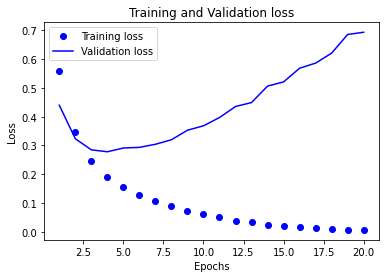

In [29]:
# plotting loss
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

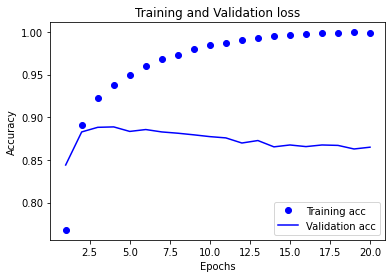

In [33]:
# plotting accuracy

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The model is overfitting as we can see at fourth epoch the validation loss is increases. Therefore let's try training the model from scratch for 3 epochs.
# Retraining the model

In [34]:
model = keras.Sequential([
                          layers.Dense(16, activation='relu'),
                          layers.Dense(16, activation='relu'),
                          layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=4, batch_size=512)

results = model.evaluate(X_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.5421 - accuracy: 0.7341
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2591 - accuracy: 0.9147
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2026 - accuracy: 0.9301
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2966 - accuracy: 0.8832


In [35]:
results

[0.296592652797699, 0.8831599950790405]

In [37]:
# if you want to use the model to generate predictions on a new data
model.predict(X_test)

array([[0.17941326],
       [0.9996601 ],
       [0.6825386 ],
       ...,
       [0.12928095],
       [0.06246841],
       [0.5974989 ]], dtype=float32)